In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
x = np.array([[2,1],  [3.1,1.4], [4.5, 2.5], [5, 2.7]])

In [5]:
np.linalg.matrix_rank(x)

2

## Q1 a)

In [2]:
def weights(X, y):
    XT = np.transpose(X)
    A = np.dot(XT, X)
    AI = np.linalg.inv(A)
    p = np.dot(AI, XT)
    w = np.dot(p, y)
    return w

In [5]:
#input the data matrix
x = np.array([[3,1],  [0,3], [0,4]])
y = np.array([[1],[3],[1]])

In [6]:
#a The calories/gram are 4.25 for carbohydrate, 17.5 for fat and 3.75 for protein.
w = weights(x, y)
w

array([[0.16],
       [0.52]])

In [8]:
a =np.dot(x, w)


In [9]:
a

array([[1.  ],
       [1.56],
       [2.08]])

In [11]:
u = np.array([[1,0],  [0,0.6], [0,0.8]])

In [13]:
ut = np.transpose(u)
ut

array([[1. , 0. , 0. ],
       [0. , 0.6, 0.8]])

In [15]:
b=np.dot(u,ut)

## Q1 b)

In [16]:
np.dot(b,y)

array([[1.  ],
       [1.56],
       [2.08]])

In [5]:
wstar = np.array([[4], [9], [4]])

In [6]:
wstar[[0, 2], :]

array([[4],
       [4]])

In [7]:
x[:,[0, 2]]

array([[25,  1],
       [20,  2],
       [40,  6]])

In [8]:
(y - np.dot(x[:,[0, 2]], wstar[[0, 2], :]))/9

array([[0.66666667],
       [2.44444444],
       [2.88888889]])

## Q1 c)

In [9]:
x5 = np.array([[25,15,10,0,1], [20,12,8,1,2], [40,30,10,1,6], [30,15,15,0,3],[35,20,15,2,4]])
x5

array([[25, 15, 10,  0,  1],
       [20, 12,  8,  1,  2],
       [40, 30, 10,  1,  6],
       [30, 15, 15,  0,  3],
       [35, 20, 15,  2,  4]])

In [10]:
y5 = np.array([[104],[97],[193],[132],[174]])

In [11]:
x5[:, 1:]

array([[15, 10,  0,  1],
       [12,  8,  1,  2],
       [30, 10,  1,  6],
       [15, 15,  0,  3],
       [20, 15,  2,  4]])

In [12]:
#calculate the weights using complex carbohydrates and sugars (simple carbs)
w5 = weights(x5[:, 1:], y5)
w5

array([[4.],
       [4.],
       [9.],
       [4.]])

In [13]:
#calculate the weights using the total carbohydrates 
weights(x5[:, [0,3,4]], y5)

array([[4.],
       [9.],
       [4.]])

## Q4 b)

In [14]:
df = sio.loadmat("fisheriris.mat")

In [15]:
df

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jan 24 08:11:18 2019',
 '__version__': '1.0',
 '__globals__': [],
 'meas': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 

In [16]:
species = df['species']

In [17]:
meas = df['meas']

In [18]:
meas.shape

(150, 4)

In [19]:
species.shape

(150, 1)

In [20]:
def train_test_split(testset=30, num=150):
    total = list(range(num))
    test = list(np.random.choice(num, testset, replace=False))
    train = [i for i in total if not i in test]
    return train, test

In [22]:
#Creating labels 
y0 = np.zeros((50, 1))
y1 = np.ones((50,1))
y2 = np.ones((50,1)) + np.ones((50,1))
y = np.concatenate((y0, y1, y2), axis = 0)
y.shape

(150, 1)

In [60]:
def cross_validation(x, y, testset=30, num=150, loop=8):
    error = 0
    for i in range(loop):
        train, test = train_test_split(testset, num)
        wt = weights(x[train, :], y[train,:])
        yh = np.dot(x[test, :], wt)
        #Round the real-valued predictions to integers
        yhat = np.round(yh, 0)
        dta = y[test,:]- yhat 
        #error
        error += dta[np.where(dta!=0)].shape[0]
    rv = error/30
    return rv/loop

In [64]:
cross_validation(meas, y, 10 )

0.0125

## Q4 c)

In [65]:
px = []
py = []
#i is training 
for i in range(10, 141):
    err = cross_validation(meas, y, 150-i)
    py.append(err)
    px.append(i)

In [48]:
py

[0.008333333333333333,
 0.016666666666666666,
 0.025,
 0.016666666666666666,
 0.020833333333333332,
 0.025,
 0.0125,
 0.008333333333333333,
 0.016666666666666666,
 0.0125,
 0.029166666666666667,
 0.03333333333333333,
 0.020833333333333332,
 0.0125,
 0.03333333333333333,
 0.029166666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.0375,
 0.03333333333333333,
 0.03333333333333333,
 0.020833333333333332,
 0.05416666666666667,
 0.029166666666666667,
 0.058333333333333334,
 0.025,
 0.025,
 0.058333333333333334,
 0.0375,
 0.029166666666666667,
 0.058333333333333334,
 0.04583333333333333,
 0.05416666666666667,
 0.0375,
 0.05,
 0.05,
 0.020833333333333332,
 0.058333333333333334,
 0.06666666666666667,
 0.058333333333333334,
 0.058333333333333334,
 0.05416666666666667,
 0.07083333333333333,
 0.04583333333333333,
 0.058333333333333334,
 0.041666666666666664,
 0.08333333333333333,
 0.0875,
 0.09583333333333334,
 0.06666666666666667,
 0.058333333333333334,
 0.0875,
 0.07916666666666666,
 0

In [52]:
px

[140,
 139,
 138,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 109,
 108,
 107,
 106,
 105,
 104,
 103,
 102,
 101,
 100,
 99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10]

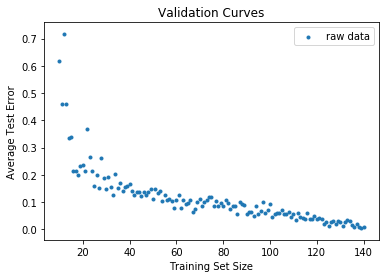

In [66]:
import matplotlib.pyplot as plt
xp = np.linspace(10, 1, 141)
plt.scatter(px, py, label='raw data', marker='.')
plt.xlabel('Training Set Size')
plt.ylabel('Average Test Error')

plt.title("Validation Curves")

plt.legend()

plt.show()

## Q4 d)

Now design a classifier using only the first three measurements (sepal length, sepal width, and petal length).

In [54]:
cross_validation(meas[:,:3], y)

0.1875

In [67]:
px3 = []
py3 = []
#i is training 
for i in range(10, 141):
    err = cross_validation(meas[:,:3], y, 150-i)
    py3.append(err)
    px3.append(i)

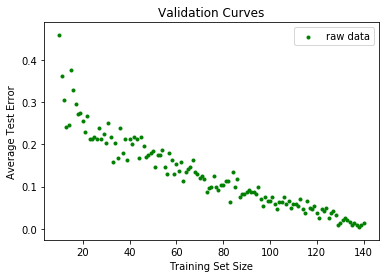

In [68]:
xp = np.linspace(10, 1, 141)
plt.scatter(px3, py3, label='raw data', marker='.', color= "green")
plt.xlabel('Training Set Size')
plt.ylabel('Average Test Error')

plt.title("Validation Curves")

plt.legend()

plt.show()